In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
X = genfromtxt('S21_M4DS_PRJ_04_ANN_X.csv', delimiter=',')
y= genfromtxt('S21_M4DS_PRJ_04_ANN_y.csv', delimiter=',')
y=np.reshape(y, (200,1))
n_input_dim, n_output_dim, = 2, 1
n_h1_dim = 3
W1 = np.random.randn(n_input_dim, n_h1_dim)/np.sqrt(n_input_dim)
W3 = np.random.randn(2, 1)/np.sqrt(2)
W2 = np.random.randn(3, 2)/np.sqrt(3)
b1 = np.zeros((200, n_h1_dim))
b2 = np.zeros((200, 2))
b3 = np.zeros((200, 1))
def sigmoid(x):
    a = 1/(1 + np.exp(-x))
    return a
def act_der(x):
    a = sigmoid(x)*(1-sigmoid(x))
    return a
model = { 
'W1': W1, 'b1': b1,'a1':sigmoid,'W2': W2, 'b2': b2,'a2':sigmoid,'W3': W3, 'b3': b3,'a3':sigmoid
}
def cost_function_R(a3,y):
    m = len(y)
    cost = 1/(2*m)* np.sum(np.square(a3-y))
    return cost
print(np.shape(y))

(200, 1)


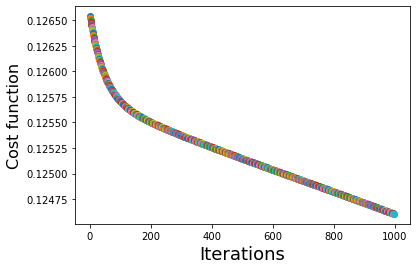

In [3]:
m = len(y)
model['W1'], model['b1'] = W1, b1
model['W2'], model['b2'] = W2, b2
model['W3'], model['b2'] = W3, b3
J_history=[]
iteration=1000
L=0
learning_rate=0.1
for i in range(iteration):
    # forward propogation
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(W3) + b3
    a3 = sigmoid(z3)     
    
    
    # back propogation   
    da3 = a3-y # from cost function
    dz3 = da3*(act_der(a3))
    dW3 = a2.T.dot(dz3)
    db3 = np.sum(dz3,axis=0,keepdims=True)
    da2 = dz3.dot(W3.T) 
    dz2 = da2*(act_der(a2))
    dW2 = a1.T.dot(dz2)
    db2 = np.sum(dz2,axis=0,keepdims=True)
    da1 = dz2.dot(W2.T)
    dz1 = da1*(act_der(a1))
    dW1 =X.T.dot(dz1)
    db1 = np.sum(dz1,axis=0,keepdims=True)
    #parameter update
    W1 = W1 - learning_rate/m * (dW1 + L*W1)
    W2 = W2 - learning_rate/m * (dW2 + L*W2)
    W3 = W3 - learning_rate/m * (dW3 + L*W3)
    b1 = b1 - learning_rate/m * db1
    b2 = b2 - learning_rate/m * db2
    b3 = b3 - learning_rate/m * db3
    J_history.append(cost_function_R(a3,y))
    plt.scatter(i,J_history[-1])
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('Cost function', fontsize=16)
print(J_history[-1])
plt.show()

In [4]:
print(J_history[-1])

0.12460477784702381
